In [1]:
import torchtext


In [1]:
import pandas as pd

pd.DataFrame

pandas.core.frame.DataFrame

In [2]:
def loader(file, is_number = False):
    data = []
    with open(file, encoding="utf8") as my_file:
        data = my_file.read().splitlines()
    if is_number:
        data = [int(i) for i in data]
    return data

In [3]:
test_data = loader("Raw/test_text.txt")
test_labels = loader("Raw/test_labels.txt", True)
val_data = loader("Raw/val_text.txt")
val_labels = loader("Raw/val_labels.txt", True)
train_data = loader("Raw/train_text.txt")
train_labels = loader("Raw/train_labels.txt", True)
mappings = {0:"anger", 1:"joy", 2:"optimism",3:	"sadness"}

In [4]:
test = pd.DataFrame({"text":test_data, "label":test_labels, "emotion":[mappings[i] for i in test_labels]})
val = pd.DataFrame({"text":val_data, "label":val_labels, "emotion":[mappings[i] for i in val_labels]})
train = pd.DataFrame({"text":train_data, "label":train_labels, "emotion":[mappings[i] for i in train_labels]})

In [9]:
import tensorflow_hub as hub
import tensorflow_text as text

bert_model_name = 'small_bert/bert_en_uncased_L-2_H-128_A-2'

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)
bert_model = hub.KerasLayer(tfhub_handle_encoder)

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [14]:
bert_preprocess_model = hub.KerasLayer("https://tfhub.dev/jeongukjae/roberta_en_cased_preprocess/1")

bert_model = hub.KerasLayer("https://tfhub.dev/jeongukjae/roberta_en_cased_L-24_H-1024_A-16/1", trainable=True)


INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/jeongukjae/roberta_en_cased_preprocess/1'.
INFO:absl:Downloaded https://tfhub.dev/jeongukjae/roberta_en_cased_preprocess/1, Total size: 10.84MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/jeongukjae/roberta_en_cased_preprocess/1'.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/jeongukjae/roberta_en_cased_L-24_H-1024_A-16/1'.
INFO:absl:Downloading https://tfhub.dev/jeongukjae/roberta_en_cased_L-24_H-1024_A-16/1: 281.64MB
INFO:absl:Downloading https://tfhub.dev/jeongukjae/roberta_en_cased_L-24_H-1024_A-16/1: 641.64MB
INFO:absl:Downloading https://tfhub.dev/jeongukjae/roberta_en_cased_L-24_H-1024_A-16/1: 991.64MB
INFO:absl:Downloading https://tfhub.dev/jeongukjae/roberta_en_cased_L-24_H-1024_A-16/1: 1.29GB
INFO:absl:Downloaded https://tfhub.dev/jeongukjae/roberta_en_cased_L-24_H-1024_A-16/1, Total size: 1.34GB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/jeongukjae/roberta_en_cased_L-24_H-1024_A-16/1'.


In [15]:
import tensorflow as tf
def build_classifier_model(number_classes):
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(number_classes, activation='softmax', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix


def execute_model(X_train, y_train, X_test, y_test, epochs):

    #we use label encoding to convert text labels to numeric, we go from ineffective -> 0 for example


    #we then need to convert the values to tensors, ensuring that the values are converted to strings.
    X_train = tf.convert_to_tensor(X_train.map(str))
    y_train = tf.convert_to_tensor(y_train)
    X_test = tf.convert_to_tensor(X_test.map(str))
    y_test = tf.convert_to_tensor(y_test)

    #extract the number of classes
    number_classes = len(set(y_train.numpy()))

    #build the model
    classifier_model = build_classifier_model(number_classes)
    #we use adam optimizer, as it is an industry standard, and the loss as sparse categorical crossentropy, as our labels are not one-hot encoded.
    classifier_model.compile(optimizer="adam",
                            loss='sparse_categorical_crossentropy',
                            metrics=['acc'])

    #we can then train the model
    print(f'Training model:')
    history = classifier_model.fit(X_train, y_train,
                               epochs=epochs)

    #evaluate the model
    print("Evaluating accuracy:")
    loss, accuracy = classifier_model.evaluate(X_test, y_test)

    print(f'Loss: {loss}')
    print(f'Accuracy: {accuracy}')

    #predict for the test data
    prediction = classifier_model.predict(X_test)
    y_pred = []
    for class_pos in prediction.argmax(axis=1):
        y_pred.append(class_pos)


    #show the f1 score and confusion matrix
    print(f"weighted f1-score:{f1_score(y_test, y_pred, average='weighted')}")

    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm)
    plt.figure(figsize = (10,7))
    fig = sns.heatmap(df_cm, annot=True, fmt='g')
    fig.set(xlabel='Predicted', ylabel='Actual')

Training model:
Epoch 1/5
102/102 [==============================] - 16s 132ms/step - loss: 1.1194 - acc: 0.5210
Epoch 2/5
102/102 [==============================] - 14s 133ms/step - loss: 0.6490 - acc: 0.7642
Epoch 3/5
102/102 [==============================] - 14s 133ms/step - loss: 0.4240 - acc: 0.8628
Epoch 4/5
102/102 [==============================] - 13s 132ms/step - loss: 0.2369 - acc: 0.9266
Epoch 5/5
102/102 [==============================] - 14s 133ms/step - loss: 0.1760 - acc: 0.9444
Evaluating accuracy:
45/45 [==============================] - 5s 110ms/step - loss: 1.2445 - acc: 0.7002
Loss: 1.2444878816604614
Accuracy: 0.7002111077308655
weighted f1-score:0.6934660820093616


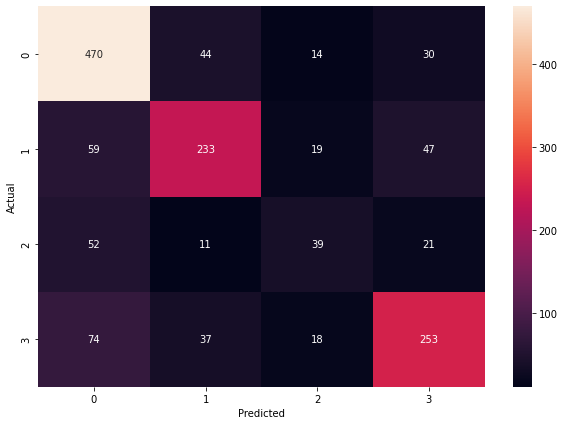

In [18]:
X_train, y_train = train.text, train.label
X_test, y_test = test.text, test.label
execute_model(X_train, y_train, X_test, y_test, 5)

In [ ]:

from transformers import RobertaTokenizer

tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

In [ ]:
from torchtext.legacy.data import Field, BucketIterator, Iterator

MAX_SEQ_LEN = 256
BATCH_SIZE = 16
PAD_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)
UNK_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.unk_token)


# Define columns to read.
label_field = Field(sequential=False, use_vocab=False, batch_first=True)
text_field = Field(use_vocab=False,
                   tokenize=tokenizer.encode,
                   include_lengths=False,
                   batch_first=True,
                   fix_length=MAX_SEQ_LEN,
                   pad_token=PAD_INDEX,
                   unk_token=UNK_INDEX)

fields = {'titletext' : ('titletext', text_field), 'label' : ('label', label_field)}


# # Read preprocessed CSV into TabularDataset and split it into train, test and valid.
# train_data, valid_data, test_data = TabularDataset(path=f"{data_path}/prep_news.csv",
#                                                    format='CSV',
#                                                    fields=fields,
#                                                    skip_header=False).split(split_ratio=[0.70, 0.2, 0.1],
#                                                                             stratified=True,
#                                                                             strata_field='label')

# Create train and validation iterators.
# train_iter, valid_iter = BucketIterator.splits((train, valid_data),
#                                                batch_size=BATCH_SIZE,
#                                                device=device,
#                                                shuffle=True,
#                                                sort_key=lambda x: len(x.titletext),
#                                                sort=True,
#                                                sort_within_batch=False)

# Test iterator, no shuffling or sorting required.
test_iter = Iterator(test, batch_size=BATCH_SIZE, device=device, train=False, shuffle=False, sort=False)
